In [2]:
import os
import sys
import torch
import numpy as np
sys.path.append("/home/yang_liu/python_workspace/gaussian-splatting-lightning")

In [5]:
path_log = "../outputs/citygs2d_rubble_2grad/blocks/block_0/output.log"
log_content = open(path_log, "r").readlines()

binning_mem = []
reserved_mem = []
max_radiis = []
image_names = []
for line in log_content:
    if "Allocated memory size for Binning: " in line:
        memory_size = float(line.split(": ")[1].split(" ")[0])
        binning_mem.append(memory_size)
    if "Reserved Memory:  " in line:
        memory_size = float(line.split(":  ")[1].split(" ")[0])
        reserved_mem.append(memory_size)
    if "Max Radius:  " in line:
        max_radii = float(line.split(":  ")[1].split(" ")[0])
        max_radiis.append(np.log10(max_radii))
    if "Image Name: " in line:
        image_name = line.split(": ")[1].split("\n")[0]
        image_names.append(image_name)

max_radiis = np.array(max_radiis)
max_radiis[max_radiis < 9.2] = 0
delta_reserved_mem = [0] + [reserved_mem[i] - reserved_mem[i-1] for i in range(1, len(reserved_mem))]

Text(0, 0.5, 'Memory (MB)')

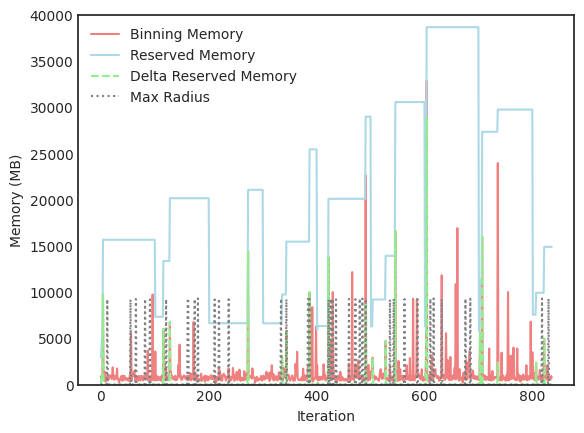

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
plt.plot(binning_mem, label="Binning Memory", c='lightcoral')
plt.plot(reserved_mem, label="Reserved Memory", c='lightblue')
plt.plot(delta_reserved_mem, label="Delta Reserved Memory", c='lightgreen', linestyle='--')
plt.plot(max_radiis * 1e3, label="Max Radius", c='grey', linestyle='dotted')

plt.ylim(0, 4e4)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Memory (MB)")

In [50]:
extreme_case = []
for i in range(len(binning_mem)):
    if binning_mem[i] > 2.5e3:
        extreme_case.append(image_names[i])
        print(f"Image Name: {image_names[i]}, Binning Memory: {binning_mem[i]}, Reserved Memory: {reserved_mem[i]}")

unique_extreme_case = list(set(extreme_case))
unique_extreme_case.sort()
print(f"{len(unique_extreme_case)} out of {len(extreme_case)} are extreme cases")
print(unique_extreme_case)

Image Name: 000477.jpg, Binning Memory: 9844.12, Reserved Memory: 15670.0
Image Name: 000215.jpg, Binning Memory: 5601.13, Reserved Memory: 15670.0
Image Name: 001568.jpg, Binning Memory: 3706.91, Reserved Memory: 15670.0
Image Name: 000477.jpg, Binning Memory: 9750.01, Reserved Memory: 15670.0
Image Name: 001569.jpg, Binning Memory: 3583.95, Reserved Memory: 7336.0
Image Name: 000216.jpg, Binning Memory: 6040.0, Reserved Memory: 13378.0
Image Name: 001419.jpg, Binning Memory: 6791.63, Reserved Memory: 20170.0
Image Name: 001568.jpg, Binning Memory: 4319.64, Reserved Memory: 20170.0
Image Name: 000215.jpg, Binning Memory: 6776.42, Reserved Memory: 20170.0
Image Name: 000477.jpg, Binning Memory: 14434.2, Reserved Memory: 21080.0
Image Name: 001418.jpg, Binning Memory: 3115.41, Reserved Memory: 9748.0
Image Name: 001569.jpg, Binning Memory: 5718.68, Reserved Memory: 15468.0
Image Name: 000476.jpg, Binning Memory: 3549.44, Reserved Memory: 15468.0
Image Name: 001419.jpg, Binning Memory: 9